<a href="https://colab.research.google.com/github/AyushNathJha007/EEGAN/blob/main/EEGAN_5_0_17_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

250257408/250242400 [==============================] - 90s 0us/step


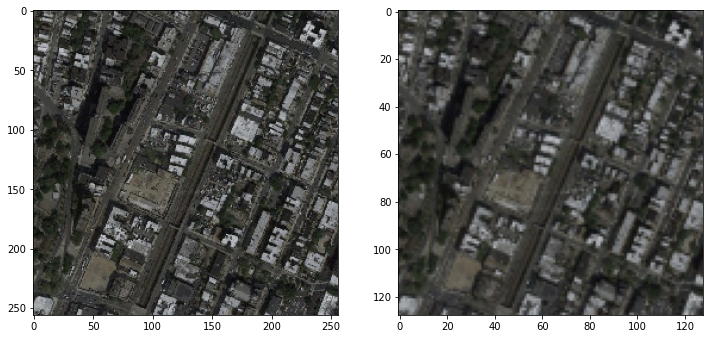

In [ ]:
import os
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import get_file
from tensorflow.io import read_file
from skimage import data, color
from skimage.transform import resize
url='http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz'
path_to_zip=get_file('maps.tar.gz', origin=url, extract=True)
inside_train=listdir('/root/.keras/datasets/maps/train')
src_list=[]
full_path='/root/.keras/datasets/maps/train/'
for filename in inside_train:
  pixels=load_img(full_path+filename, target_size=(256,512))
  pixels=img_to_array(pixels)
  src_list.append(pixels[:,:256])
src_list=np.asarray(src_list)
resized_list=[]
for i in src_list:
  image=i
  image_resized = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
                        anti_aliasing=True)
  resized_list.append(image_resized)
resized_list=np.array(resized_list)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(src_list[0].astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(resized_list[0].astype('uint8'))

In [ ]:
#resized_list=(resized_list-127.5)/127.5
#src_list=(src_list-127.5)/127.5

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, LeakyReLU, Concatenate, Lambda, Subtract, Add, Activation, Reshape, Multiply, Flatten, Dropout, Dense, BatchNormalization, Permute, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from tensorflow.keras.initializers import RandomNormal, Ones
import tensorflow as tf
from keras.losses import MeanSquaredError, MeanAbsolutePercentageError
import keras.backend as K
import numpy as np
from keras.models import model_from_json 

In [ ]:
def dense_block(in_layer):
  init=RandomNormal(stddev=0.2)
  conv1=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(in_layer) #(filters=16, kernel_size=(3,3), padding='same', kernel_initializer='he_uniform', activation='relu')(in_layer)
  conv11=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv1)
  conv12=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv1)
  conv13=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv1)
  concat1=Concatenate()([conv11, conv12, conv13])
  conv201=Concatenate()([concat1, conv11])
  conv202=Concatenate()([concat1, conv12])
  conv203=Concatenate()([concat1, conv13])
  conv21i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv201)
  conv22i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv202)
  conv23i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv203)
  conv21=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv21i)
  conv22=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv22i)
  conv23=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv23i)
  concat2=Concatenate()([conv21, conv22, conv23])
  conv301=Concatenate()([concat2, conv21i])
  conv302=Concatenate()([concat2, conv22i])
  conv303=Concatenate()([concat2, conv23i])
  conv31i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv301)
  conv32i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv302)
  conv33i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv303)
  conv31=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv31i)
  conv32=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv32i)
  conv33=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv33i)
  concat3=Concatenate()([conv31, conv32, conv33])
  conv401=Concatenate()([concat3, conv31i])
  conv402=Concatenate()([concat3, conv32i])
  conv403=Concatenate()([concat3, conv33i])
  conv41i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv401)
  conv42i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv402)
  conv43i=Conv2DTranspose(filters=16,kernel_size=(1,1),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(conv403)
  concat4=Concatenate()([conv41i, conv42i, conv43i])
  out_layer=Concatenate()([concat4, conv1])
  return out_layer

In [ ]:
def SubpixelConv2D(input_shape, scale=4):
    """
    Keras layer to do subpixel convolution.
    NOTE: Tensorflow backend only. Uses tf.depth_to_space
    Ref:
        [1] Real-Time Single Image and Video Super-Resolution Using an Efficient Sub-Pixel Convolutional Neural Network
            Shi et Al.
            https://arxiv.org/abs/1609.05158
    :param input_shape: tensor shape, (batch, height, width, channel)
    :param scale: upsampling scale. Default=4
    :return:
    """
    # upsample using depth_to_space
    def subpixel_shape(input_shape):
        dims = [input_shape[0],
                input_shape[1] * scale,
                input_shape[2] * scale,
                int(input_shape[3] / (scale ** 2))]
        output_shape = tuple(dims)
        return output_shape

    def subpixel(x):
        return tf.nn.depth_to_space(x, scale)

    return Lambda(subpixel, output_shape=subpixel_shape, name='subpixel')

In [ ]:
def build_udsn(image_shape):
  inp=Input(shape=image_shape)
  db1=dense_block(inp)
  con=Concatenate()([db1, db1])
  db2=dense_block(con)
  con=Concatenate()([db1, db2, db2])
  db3=dense_block(con)
  con=Concatenate()([db1, db2, db3, db3])
  db4=dense_block(con)
  con=Concatenate()([db1, db2, db3, db4, db4])
  db5=dense_block(con)
  con=Concatenate()([db1, db2, db3, db4, db5, db5])
  db6=dense_block(con)
  sub_net=Conv2DTranspose(filters=64,kernel_size=(4,4),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(db6)
  sub_net=Conv2DTranspose(filters=64,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(sub_net)
  sub_net=Conv2DTranspose(filters=32,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(sub_net)
  LR=Conv2DTranspose(filters=12,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal())(sub_net)
  LR=LeakyReLU(alpha=0.02)(LR)
  Ibase=SubpixelConv2D(LR.shape, scale=2)(LR)
  #Ibase=BatchNormalization(momentum=0.8)(Ibase)
  #Ibase=Activation('relu')(Ibase)
  model=Model(inputs=inp, outputs=Ibase)
  return model

In [ ]:
#eesn essentials
def meanfilter(shape, dtype=None):   #kernel to find mean of 3-channel pixel data
  f=np.array([
              [[[.3333],
                [.3333],
                [.33333]]]
  ])
  return K.variable(f, dtype='float32')
def laplacian(shape, dtype=None):   #laplacian kernel
  f=np.array([
      [[[-1]],[[-1]],[[-1]]],
      [[[-1]],[[ 8]],[[-1]]],
      [[[-1]],[[-1]],[[-1]]]
  ])
  return K.variable(f, dtype='float32')
def channel_thrice(shape, dtype=None):   #kernel to triplicate the single channel data
  f=np.array([
              [[[1, 1, 1]]]   #3 for three layers of filters
  ])
  return K.variable(f, dtype='float32')

In [ ]:
def build_eesn(Ibase_shape):
  inp=Input(shape=(Ibase_shape))
  bw=Conv2D(filters=1, kernel_size=(1,1), padding='same', kernel_initializer=meanfilter, trainable=False)(inp)  #no change recommended   
  Iedge=Conv2D(filters=1, kernel_size=(3,3), padding='same', kernel_initializer=laplacian, trainable=False)(bw)     #no change recommended
  Itrip=Conv2D(filters=3, kernel_size=(1,1), padding='same', kernel_initializer=channel_thrice, trainable=False)(Iedge)   #no change recommended
  
  sub=Subtract()([inp, Itrip])
  ee=Conv2D(filters=32, kernel_size=(3,3), padding='same', strides=(2,2))(Iedge)
  ee=Conv2D(filters=64, kernel_size=(3,3), padding='same')(ee)
  ee=Conv2D(filters=16, kernel_size=(1,1), padding='same')(ee)
  
  #dense net
  db=dense_block(ee)
  db=dense_block(db)
  db=dense_block(db)
  db=Conv2D(16, kernel_size=(3,3), padding='same')(db)

  #mask branch
  mb=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal())(ee)
  mb=LeakyReLU(alpha=0.02)(mb)
  mb=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal())(mb)
  mb=LeakyReLU(alpha=0.02)(mb)
  mb=Conv2DTranspose(filters=16,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal())(mb)
  mb=LeakyReLU(alpha=0.02)(mb)
  mb=Activation('sigmoid')(mb)

  #transpose=Permute((2,1,3), input_shape=db.shape)(db)
  product=Multiply()([db, mb])  #multiplies element wise
  #con=Concatenate()([mb, db])
  #transpose2=Permute((2,1,3), input_shape=product.shape)(product)
  sub_net=Conv2DTranspose(filters=64,kernel_size=(4,4),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(product)
  sub_net=Conv2DTranspose(filters=64,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(sub_net)
  sub_net=Conv2DTranspose(filters=32,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu')(sub_net)
  ee=Conv2DTranspose(filters=4,kernel_size=(3,3),padding='same',kernel_initializer=tf.keras.initializers.GlorotNormal())(sub_net)
  Istedge=SubpixelConv2D(ee.shape, scale=2)(ee)
  #Istedge=Conv2D(1, kernel_size=(3,3), padding='same')(Istedge)
  Istedge=Conv2D(filters=3, kernel_size=(1,1), padding='same', kernel_initializer=channel_thrice, trainable=False)(Istedge)  #no change recommended
  
  #Istedge=BatchNormalization()(Istedge)
  SR=Add()([Istedge, sub])
  #SR=BatchNormalization()(SR)
  #SR=Activation('relu')(SR)
  
  model=Model(inputs=inp, outputs=SR)
  return model

In [ ]:
def consistency_loss(y_true, y_pred):
  lambd=5
  return charbonnier_penalty(y_true, y_pred)

mape=MeanAbsolutePercentageError()
def consistency_model(img_shape):
  inp=Input(shape=img_shape)
  Ibase=udsn(inp)
  ISR=eesn(Ibase)
  model=Model(inputs=inp, outputs=ISR)
  opt=Adam(learning_rate=0.00001, beta_1=0.005)
  model.compile(loss='mse', optimizer=opt)
  return model

In [ ]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(weights='imagenet', input_shape=(256,256,3), include_top=False)
vgg.trainable=False
#resize_layer=Conv2D(filters=3, kernel_size=(33,33), kernel_initializer=Ones(), trainable=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
def charbonnier_penalty(y_true, y_pred):
  epsilon=0.00001 #compensation parameter
  return K.mean(Subtract()([y_true, y_pred])**2 + epsilon**2)
  #return K.mean(K.square(y_true- y_pred) + epsilon**2)

def charbonnier_model(img_shape):
  inp=Input(shape=img_shape)
  Ibase=udsn(inp)
  #resize_Ibase=resize_layer(Ibase)
  out=vgg(Ibase)/10
  model=Model(inputs=inp, outputs=out)
  opt=Adam(learning_rate=0.00001, beta_1=0.005, clipnorm=1)
  model.compile(loss='mse', optimizer=opt)
  return model

In [ ]:
def build_discriminator(img_shape):
  def block(Input, k, n, s):
    l1=Conv2D(n, kernel_size=(k,k), strides=(s,s), padding='same')(Input)
    #Bn=BatchNormalization(momentum=0.5)(l1)
    Lrlu=LeakyReLU(alpha=0.2)(l1)
    return Lrlu
  I1=Input(shape=img_shape)
  c1=Conv2D(64, kernel_size=(3,3), padding='same')(I1)
  l1=LeakyReLU(alpha=0.2)(c1)
  b1=block(l1, 3, 64, 2)
  b2=block(b1, 3, 128, 1)
  b3=block(b2, 3, 128,2)
  b4=block(b3, 3, 256, 1)
  b5=block(b4, 3, 256, 2)
  b6=block(b5, 3, 512, 1)
  b7=block(b6, 3, 512, 2)
  b8=Flatten()(b7)
  #b9=Dropout(.1)(b8)
  l8=Dense(1024)(b8)
  #b10=Dropout(.025)(l8)
  l9=LeakyReLU(alpha=0.2)(l8)
  l10=Dense(1, activation='sigmoid')(l9)
  m=Model(inputs=I1, outputs=l10)
  opt=Adam(learning_rate=0.00001, beta_1=0.005, clipnorm=1) #+1z 
  m.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return m

In [ ]:
def build_gan(img_shape):
  inp=Input(shape=img_shape)
  Ibase=udsn(inp)
  ISR=eesn(Ibase)
  out=disc(ISR)
  disc.trainable=False
  model=Model(inputs=inp, outputs=out)
  opt=Adam(learning_rate=0.00001, beta_1=0.005, clipnorm=1)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
udsn=build_udsn(image_shape=(128,128,3))
#plot_model(udsn)

In [ ]:
eesn=build_eesn(Ibase_shape=(256,256,3))
#plot_model(eesn)

In [ ]:
charb=charbonnier_model(img_shape=(128,128,3))
#charb.summary()

In [ ]:
cons_model=consistency_model(img_shape=(128,128,3))
#cons_model.summary()

In [ ]:
disc=build_discriminator(img_shape=(256,256,3))
#disc.summary()

In [ ]:
gan=build_gan(img_shape=(128,128,3))
#gan.summary()

In [ ]:
def train_charbonnier_model(n_batch):
  ix=np.random.randint(0, 1096, n_batch)
  input_batch=resized_list[ix]
  HR_batch=src_list[ix]
  #input_batch=input_batch*127.5+127.5
  HR_batch=HR_batch
  #extracting HR Image features through VGG
  #HR_resized=resize_layer(HR_batch)
  ground_feat=vgg(HR_batch)/10

  #print(input_batch.shape)
  
  loss, acc=charb.train_on_batch(input_batch, ground_feat), 0
  return loss, acc

In [ ]:
def train_consistency_model(n_batch):
  ix=np.random.randint(0, 1096, n_batch)
  input_batch=resized_list[ix]
  HR_batch=src_list[ix]

  loss, acc=cons_model.train_on_batch(input_batch, HR_batch), 0
  return loss, acc

In [ ]:
def generate_real_samples(n_batch):
  ix=np.random.randint(0, 1096, n_batch)
  HR_batch=src_list[ix]
  y_real=np.ones(shape=(n_batch,))
  return HR_batch, y_real

def generate_fake_samples(n_batch):
  ix=np.random.randint(0, 1096, n_batch)
  LR_batch=resized_list[ix]
  HR_batch_fake=eesn(udsn(LR_batch))
  y_fake=np.zeros(shape=(n_batch,))
  return HR_batch_fake, y_fake

In [ ]:
def train(n_epochs=20, n_batch=2):
  half_batch=n_batch//2
  for i in range(n_epochs):
    ix=np.random.randint(0, 1096, n_batch)
    LR_batch=resized_list[ix]
    HR_batch=src_list[ix]
    
    #charb_loss, cons_loss=0, 0
    charb_loss, charb_acc=train_charbonnier_model(half_batch)
    cons_loss, cons_acc=train_consistency_model(half_batch)

    real_batch, y_real=generate_real_samples(half_batch)
    fake_batch, y_fake=generate_fake_samples(half_batch)

    disc_loss_real, disc_acc_real=disc.train_on_batch(real_batch, y_real)
    disc_loss_fake, disc_acc_fake=disc.train_on_batch(fake_batch, y_fake)

    false_positives=np.ones(shape=(n_batch,))
    gan_loss, gan_acc= gan.train_on_batch(LR_batch, false_positives)

    print('%d charb_loss[%.6f] cons_loss[%.6f] disc_loss_real[%.6f] disc_loss_fake[%.6f] gan_loss[%.6f]'%(i+1, charb_loss, cons_loss, disc_loss_real, 
                                                                                                          disc_loss_fake, gan_loss))

In [ ]:
train(4000, 4) 

1 charb_loss[0.529500] cons_loss[1341.786743] disc_loss_real[0.012628] disc_loss_fake[0.000003] gan_loss[10.562049]
2 charb_loss[0.292345] cons_loss[940.515320] disc_loss_real[0.000000] disc_loss_fake[0.157804] gan_loss[20.580160]
3 charb_loss[0.528601] cons_loss[584.965881] disc_loss_real[0.005831] disc_loss_fake[0.002491] gan_loss[13.307948]
4 charb_loss[0.171914] cons_loss[802.373474] disc_loss_real[0.114132] disc_loss_fake[5.181403] gan_loss[12.788387]
5 charb_loss[0.273105] cons_loss[786.707581] disc_loss_real[0.000297] disc_loss_fake[0.000010] gan_loss[14.084870]
6 charb_loss[0.374172] cons_loss[1326.057251] disc_loss_real[0.000324] disc_loss_fake[0.000000] gan_loss[12.898624]
7 charb_loss[0.307864] cons_loss[727.153931] disc_loss_real[0.000021] disc_loss_fake[0.000017] gan_loss[12.213779]
8 charb_loss[0.237122] cons_loss[1512.292725] disc_loss_real[0.001579] disc_loss_fake[0.000333] gan_loss[7.815999]
9 charb_loss[0.146617] cons_loss[1175.562378] disc_loss_real[0.033786] disc_lo

In [ ]:
#for i in range(1000):
#  print(i, train_charbonnier_model(1), train_consistency_model(1))

In [ ]:
"""
from keras.applications.vgg16 import VGG16
vgg=VGG16(weights='imagenet', input_shape=(256,256,3), include_top=False)
vgg.trainable=False
#resize_layer=Conv2D(filters=3, kernel_size=(33,33), kernel_initializer=Ones(), trainable=False)
"""

"\nfrom keras.applications.vgg16 import VGG16\nvgg=VGG16(weights='imagenet', input_shape=(256,256,3), include_top=False)\nvgg.trainable=False\n#resize_layer=Conv2D(filters=3, kernel_size=(33,33), kernel_initializer=Ones(), trainable=False)\n"

In [ ]:
"""
def charbonnier_penalty(y_true, y_pred):
  epsilon=0.001 #compensation parameter
  return K.mean(Subtract()([y_true, y_pred])**2 + epsilon**2)
  #return K.mean(K.square(y_true- y_pred) + epsilon**2)

def charbonnier_model(img_shape):
  inp=Input(shape=img_shape)
  Ibase=udsn(inp)
  #resize_Ibase=resize_layer(Ibase)
  out=vgg(Ibase*127.5+127.5)
  model=Model(inputs=inp, outputs=out)
  opt=Adam(learning_rate=0.002, beta_1=0.5, clipnorm=1)
  model.compile(loss='mse', optimizer=opt)
  return model
"""

"\ndef charbonnier_penalty(y_true, y_pred):\n  epsilon=0.001 #compensation parameter\n  return K.mean(Subtract()([y_true, y_pred])**2 + epsilon**2)\n  #return K.mean(K.square(y_true- y_pred) + epsilon**2)\n\ndef charbonnier_model(img_shape):\n  inp=Input(shape=img_shape)\n  Ibase=udsn(inp)\n  #resize_Ibase=resize_layer(Ibase)\n  out=vgg(Ibase*127.5+127.5)\n  model=Model(inputs=inp, outputs=out)\n  opt=Adam(learning_rate=0.002, beta_1=0.5, clipnorm=1)\n  model.compile(loss='mse', optimizer=opt)\n  return model\n"

In [ ]:
"""
charb=charbonnier_model(img_shape=(128,128,3))
#charb.summary()
"""

'\ncharb=charbonnier_model(img_shape=(128,128,3))\n#charb.summary()\n'

In [ ]:
"""
def train_charbonnier_model(n_batch):
  ix=np.random.randint(0, 1096, n_batch)
  input_batch=resized_list[ix]
  HR_batch=src_list[ix]
  #input_batch=input_batch*127.5+127.5
  HR_batch=HR_batch*127.5+127.5
  #extracting HR Image features through VGG
  #HR_resized=resize_layer(HR_batch)
  ground_feat=vgg(HR_batch)

  #print(input_batch.shape)
  
  loss, acc=charb.train_on_batch(input_batch, ground_feat), 0
  return loss, acc
"""

'\ndef train_charbonnier_model(n_batch):\n  ix=np.random.randint(0, 1096, n_batch)\n  input_batch=resized_list[ix]\n  HR_batch=src_list[ix]\n  #input_batch=input_batch*127.5+127.5\n  HR_batch=HR_batch*127.5+127.5\n  #extracting HR Image features through VGG\n  #HR_resized=resize_layer(HR_batch)\n  ground_feat=vgg(HR_batch)\n\n  #print(input_batch.shape)\n  \n  loss, acc=charb.train_on_batch(input_batch, ground_feat), 0\n  return loss, acc\n'

In [ ]:
"""
for i in range(100):
  print(train_charbonnier_model(1))
"""

'\nfor i in range(100):\n  print(train_charbonnier_model(1))\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
todrive='/content/drive/MyDrive/Kaggle_3/'

In [ ]:
# save the models (EESN, UDSN, DISC)


# serialize weights to HDF5
udsn.save_weights(todrive + "udsn5000_17_11.h5")


# serialize weights to HDF5
eesn.save_weights(todrive + "eesn5000_17_11.h5")


# serialize weights to HDF5
disc.save_weights(todrive + "disc5000_17_11.h5")

print("Saved models to disk")

Saved models to disk


In [ ]:
# load the models (EESN, UDSN, DISC)

udsn.load_weights(todrive + "udsn5000_17_11.h5")

eesn.load_weights(todrive + "eesn5000_17_11.h5")

disc.load_weights(todrive + "disc5000_17_11.h5")

print("Loaded models from disk")

Loaded models from disk


Text(0.5, 1.0, 'IHR')

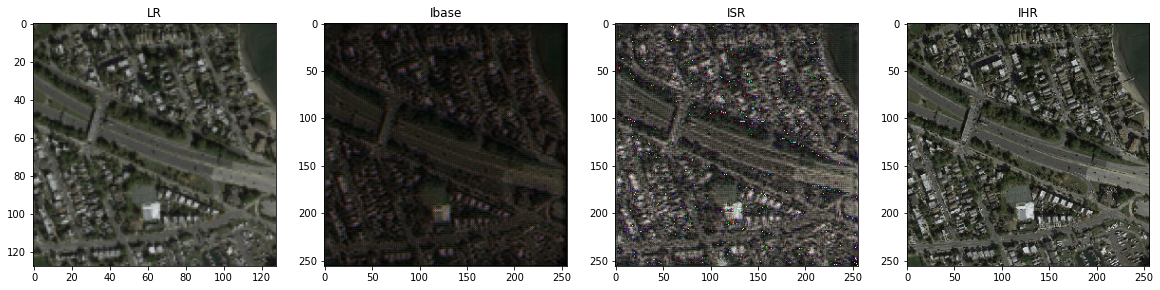

In [ ]:
ix=np.random.randint(0, 1096, 1)
ILR=resized_list[ix]
IHR=src_list[ix]
Ibase=udsn(ILR)
ISR=eesn(Ibase)

plt.figure(figsize=(20, 80))

plt.subplot(1,4,1)
#ILR=ILR*127.5+127.5
plt.imshow(ILR.reshape(128,128,3).astype('uint8'))
plt.title('LR')

plt.subplot(1,4,2)
#Ibase1=Ibase*127.5+127.5
plt.imshow(np.array(Ibase).reshape(256,256,3).astype('uint8'))
plt.title('Ibase')

plt.subplot(1,4,3)
#ISR1=ISR*127.5+127.5
plt.imshow(np.array(ISR).reshape(256,256,3).astype('uint8'))
plt.title('ISR')

plt.subplot(1,4,4)
plt.imshow((IHR).reshape(256,256,3).astype('uint8'))
plt.title('IHR')

In [ ]:
#vgg(Ibase)

In [ ]:
Ibase*127.5+127.5

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[171.12415 ,  57.799927, 233.3677  ],
         [ 59.722015,  53.44861 ,  82.36383 ],
         [154.34471 ,  52.68966 , 180.59126 ],
         ...,
         [ 75.72571 ,  53.28528 ,  88.43997 ],
         [ 63.05787 ,  81.206436,  67.731316],
         [ 63.292137,  53.70392 ,  67.67514 ]],

        [[221.60709 ,  96.18275 ,  65.43609 ],
         [ 60.959007,  52.888947,  67.63507 ],
         [216.10953 , 208.46918 ,  62.723892],
         ...,
         [ 62.748817,  53.564613,  67.17191 ],
         [120.19813 ,  58.61068 ,  92.729866],
         [ 62.738503,  53.611732,  67.603485]],

        [[236.94193 , 166.53381 ,  88.93919 ],
         [ 60.012863,  52.70272 , 152.86488 ],
         [232.22989 ,  53.17414 , 122.29303 ],
         ...,
         [ 63.20777 ,  61.851807,  77.73239 ],
         [ 62.904083,  84.77275 ,  81.522   ],
         [ 63.239296,  53.705887,  67.934364]],

        ...,

        [[ 61.41825 , 225.01328 , 

In [ ]:
ISR1

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[8.4241486e+00, 2.6151123e+00, 1.6810371e+01],
         [2.5320573e+02, 2.5283667e+02, 2.5358743e+02],
         [2.2199921e+01, 7.9496536e+00, 2.9335617e+01],
         ...,
         [2.1832176e+02, 2.0803882e+02, 2.2248169e+02],
         [1.9534213e+02, 2.0291321e+02, 1.9757765e+02],
         [2.4806044e+02, 2.4662823e+02, 2.4830658e+02]],

        [[1.1846227e+02, 4.4766068e+01, 3.2404510e+01],
         [2.5406793e+02, 2.5383484e+02, 2.5411813e+02],
         [4.9209595e-01, 5.2210236e-01, 8.7394714e-02],
         ...,
         [1.7338329e+02, 1.6643851e+02, 1.7604347e+02],
         [2.5466614e+01, 1.4084404e+01, 1.9276154e+01],
         [2.2988083e+02, 2.2611469e+02, 2.3094334e+02]],

        [[4.2500534e+00, 2.1380081e+00, 8.0572510e-01],
         [2.3064609e+02, 2.2746486e+02, 2.4594916e+02],
         [1.1422852e+01, 1.7112274e+00, 3.3972168e+00],
         ...,
         [1.4099672e+02, 1.3960463e+02, 1.5134418e+02],


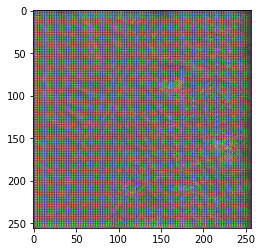

In [ ]:
plt.imshow(np.array(Ibase*127.5+127.5).reshape(256,256,3).astype('uint8'))

In [ ]:
Ibase.shape

TensorShape([1, 256, 256, 3])